In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [77]:
clean_complete = pd.read_csv('/root/Documents/covid_19_clean_complete.csv')
clean_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [78]:
confirmed_cases = pd.read_csv('/root/Documents/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [79]:
deaths_reported = pd.read_csv('/root/Documents/time_series_covid19_deaths_global.csv')
deaths_reported.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
recovered_cases = pd.read_csv('/root/Documents/time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,5,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,10,17,17,31,31,33,44,52,67
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,24,65,29,29,31,31,37,46,61
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,10,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [81]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20'],
      dtype='object')

In [82]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [83]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [84]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-2]]

In [85]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,0,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,0,0,0,0,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [86]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
from datetime import datetime
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries.iloc[0].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [87]:
confirmed_sum

418678

In [88]:
death_sum

18625

In [89]:
recovered_sum

8

In [90]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101794,
 105831,
 109805,
 113571,
 118602,
 125875,
 128353,
 145209,
 156104,
 167454,
 181573,
 197150,
 214909,
 242706,
 272164,
 304519,
 337089,
 378547,
 418678]

In [91]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [92]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62]])

In [93]:
world_cases

array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101794],
       [105831],
       [109805],
       [113571],
       [118602],
       [125875],
       [128353],
       [145209],
       [156104],
       [167454],
       [181573],
       [197150],
       [214909],
       [242706],
       [272164

In [94]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [95]:
total_recovered

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8]])

In [96]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [97]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [98]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [99]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_dates = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-2]]

In [100]:
latest_confirmed

0       74
1      123
2      264
3      164
4        3
      ... 
236      1
237      1
238      0
239      2
240      1
Name: 3/24/20, Length: 241, dtype: int64

In [101]:
latest_dates

0       1
1       5
2      19
3       1
4       0
       ..
236     0
237     0
238     0
239     0
240     0
Name: 3/24/20, Length: 241, dtype: int64

In [102]:
latest_recoveries

0       1
1       2
2      65
3       1
4       0
       ..
237     0
238     0
239     0
240     0
241     0
Name: 3/23/20, Length: 242, dtype: int64

In [103]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [104]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i) 
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=False)]
for i in range (len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [105]:
print('Confirmed cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Regions:
Eritrea: 1 cases
Papua New Guinea: 1 cases
Saint Vincent and the Grenadines: 1 cases
Somalia: 1 cases
Grenada: 1 cases
Syria: 1 cases
Timor-Leste: 1 cases
Belize: 1 cases
Libya: 1 cases
Bhutan: 2 cases
Mauritania: 2 cases
Nepal: 2 cases
Nicaragua: 2 cases
Dominica: 2 cases
Laos: 2 cases
Angola: 3 cases
Antigua and Barbuda: 3 cases
Cabo Verde: 3 cases
Central African Republic: 3 cases
Chad: 3 cases
Djibouti: 3 cases
Gambia: 3 cases
Liberia: 3 cases
Niger: 3 cases
Saint Lucia: 3 cases
Sudan: 3 cases
Zambia: 3 cases
Zimbabwe: 3 cases
Mozambique: 3 cases
Congo (Brazzaville): 4 cases
Eswatini: 4 cases
Fiji: 4 cases
Guinea: 4 cases
Holy See: 4 cases
Bahamas: 5 cases
El Salvador: 5 cases
Guyana: 5 cases
Benin: 6 cases
Gabon: 6 cases
Haiti: 7 cases
Namibia: 7 cases
Seychelles: 7 cases
Suriname: 7 cases
Equatorial Guinea: 9 cases
Uganda: 9 cases
Mongolia: 10 cases
Ethiopia: 12 cases
Tanzania: 12 cases
Maldives: 13 cases
Madagascar: 17 cases
Barbados: 18 cas

In [106]:
unique_provinces = list(confirmed_cases['Province/State'].unique())
unique_provinces

outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

ValueError: list.remove(x): x not in list

In [107]:
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

In [108]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 39 cases
New South Wales: 818 cases
Northern Territory: 6 cases
Queensland: 397 cases
South Australia: 170 cases
Tasmania: 28 cases
Victoria: 411 cases
Western Australia: 175 cases
Alberta: 359 cases
British Columbia: 617 cases
Grand Princess: 13 cases
Manitoba: 21 cases
New Brunswick: 18 cases
Newfoundland and Labrador: 35 cases
Nova Scotia: 51 cases
Ontario: 588 cases
Prince Edward Island: 3 cases
Quebec: 1013 cases
Saskatchewan: 72 cases
Anhui: 990 cases
Beijing: 558 cases
Chongqing: 578 cases
Fujian: 318 cases
Gansu: 136 cases
Guangdong: 1428 cases
Guangxi: 254 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 319 cases
Heilongjiang: 484 cases
Henan: 1274 cases
Hong Kong: 386 cases
Hubei: 67801 cases
Hunan: 1018 cases
Inner Mongolia: 75 cases
Jiangsu: 636 cases
Jiangxi: 936 cases
Jilin: 93 cases
Liaoning: 127 cases
Macau: 25 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 249 cases
Shandong: 768 cases
Shanghai: 414 cases
Shanxi: 134 cases
Sichuan: 5

In [109]:
nan_indices = []

for i in range (len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_cofirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

NameError: name 'province_cofirmed_cases' is not defined

AttributeError: module 'matplotlib.pyplot' has no attribute 'titles'

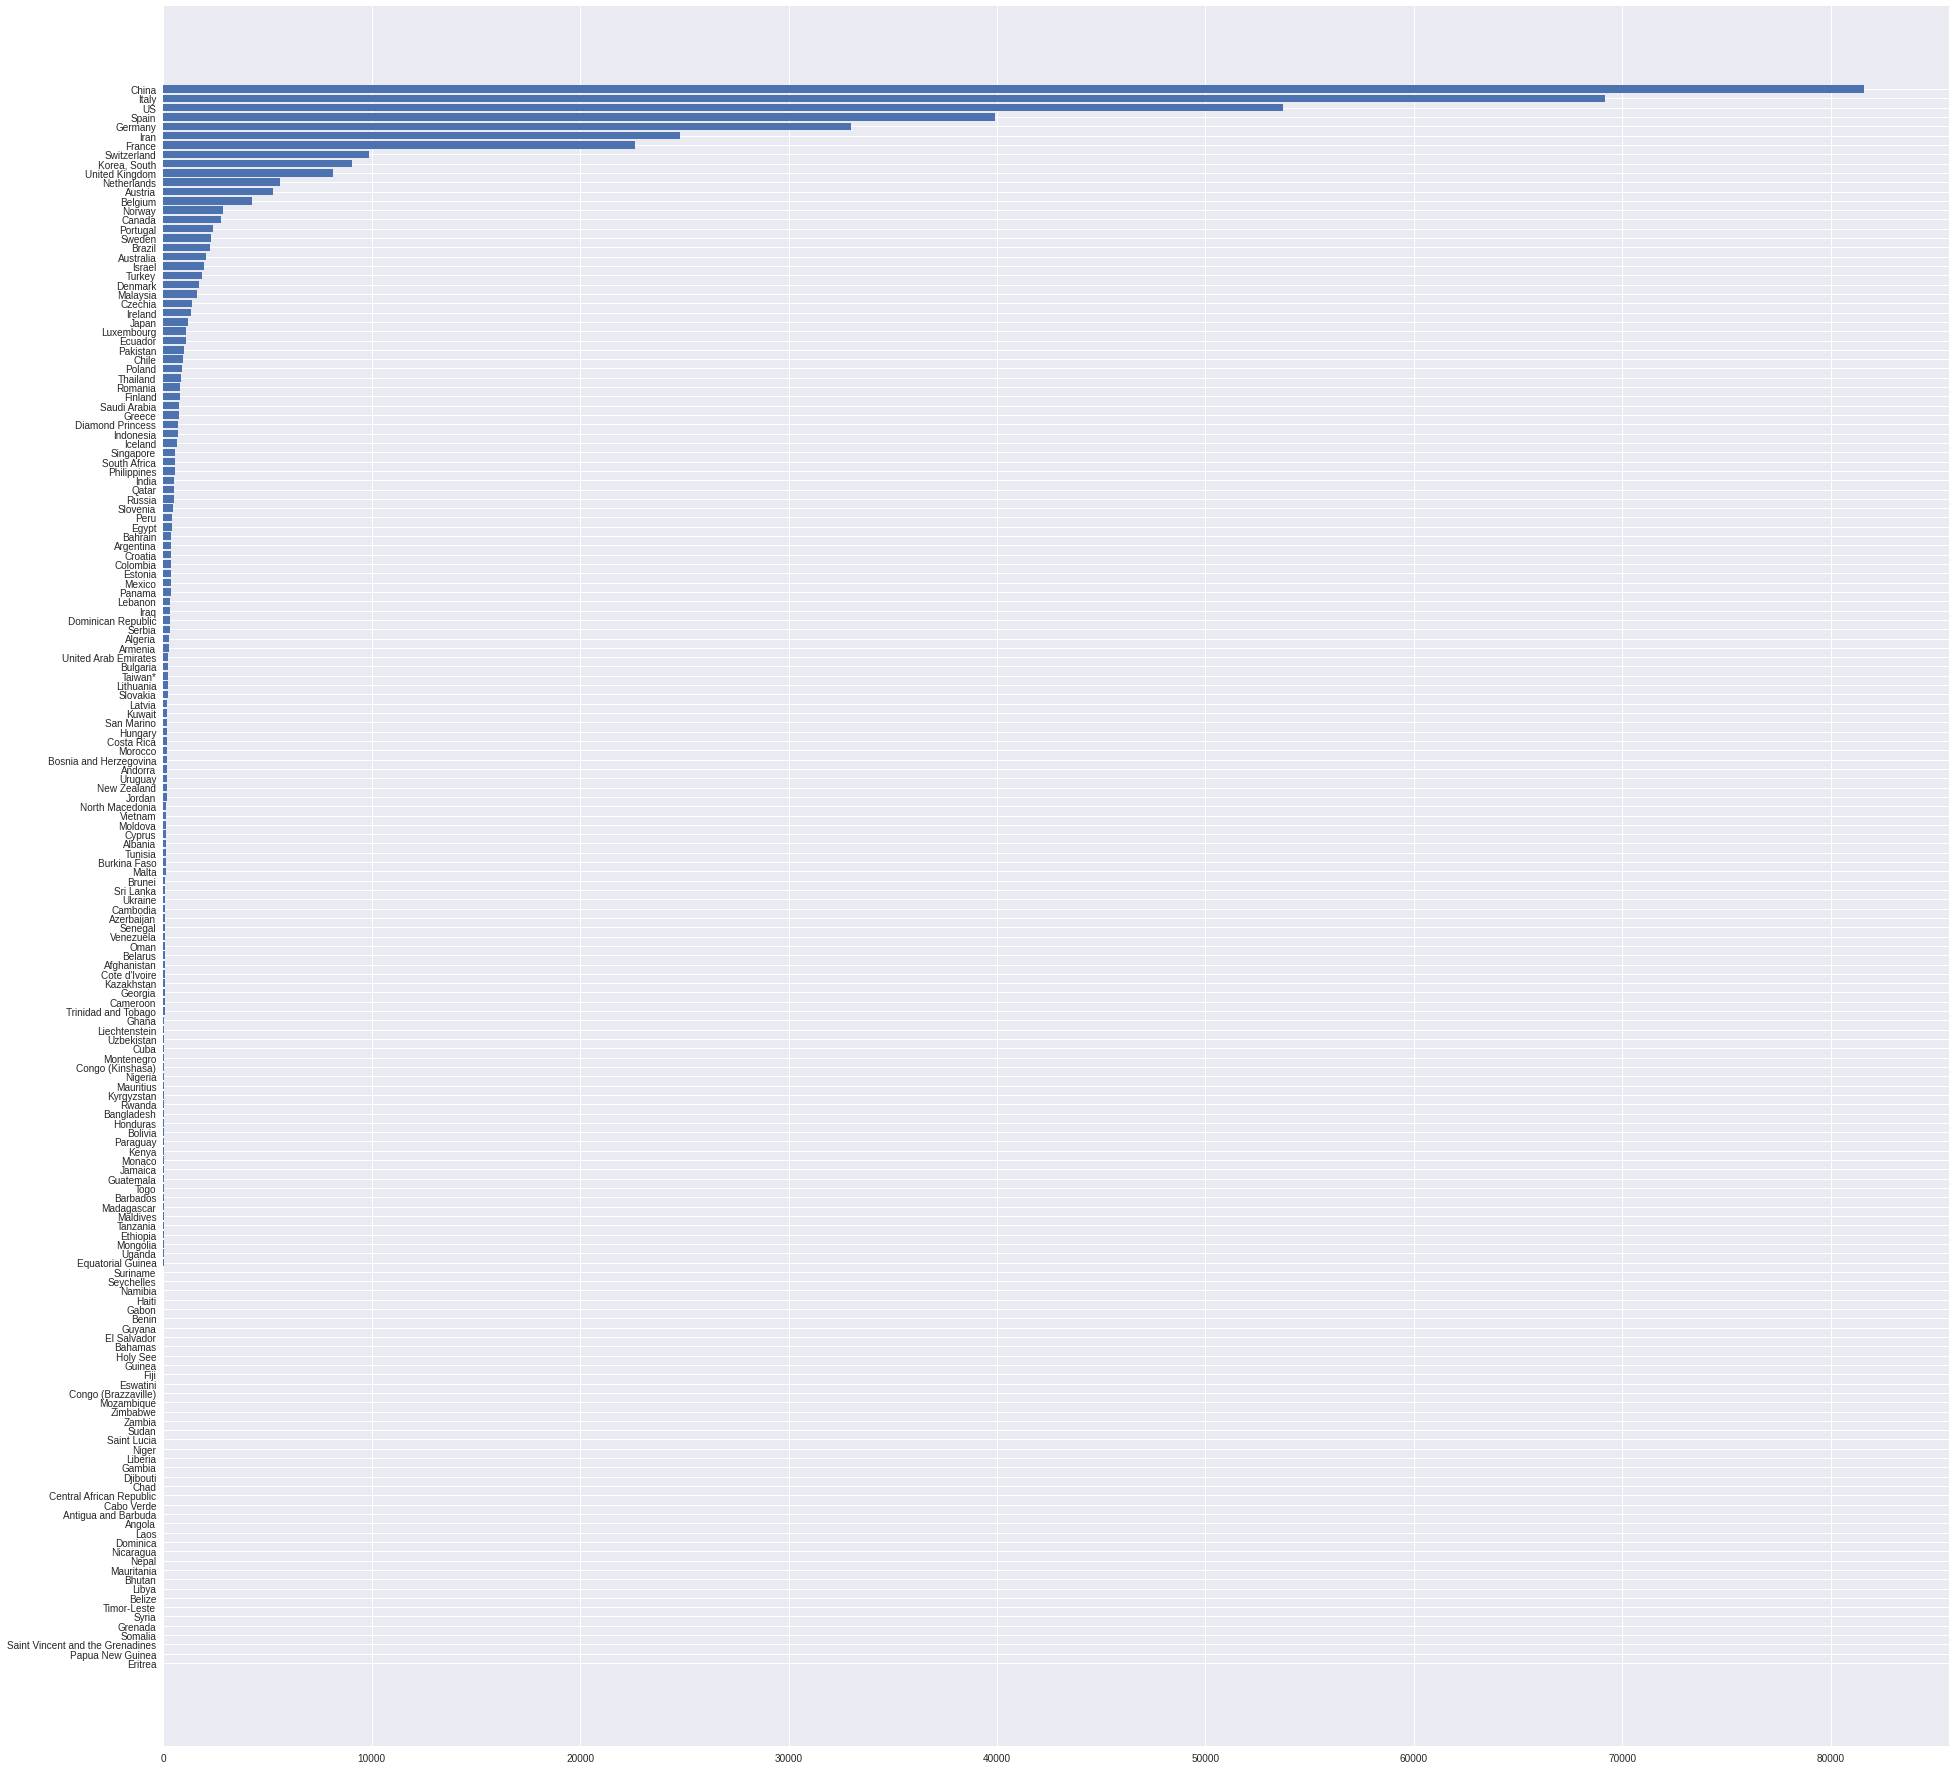

In [110]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.titles('Number of COVID-19 Confirmed Cases in Countries')
plt.xlabel('Number of COVID-19 Confirmed Cases')
plt.show()

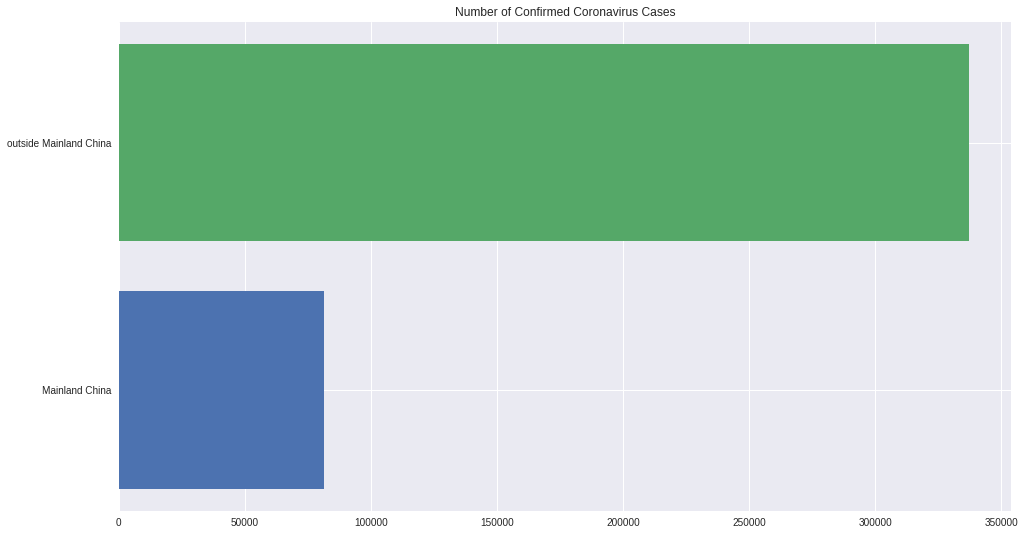

In [113]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [114]:
print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed + outside_mainland_china_confirmed))

Outside Mainland China 337087 cases
Mainland China: 81591 cases
Total: 418678 cases


In [118]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

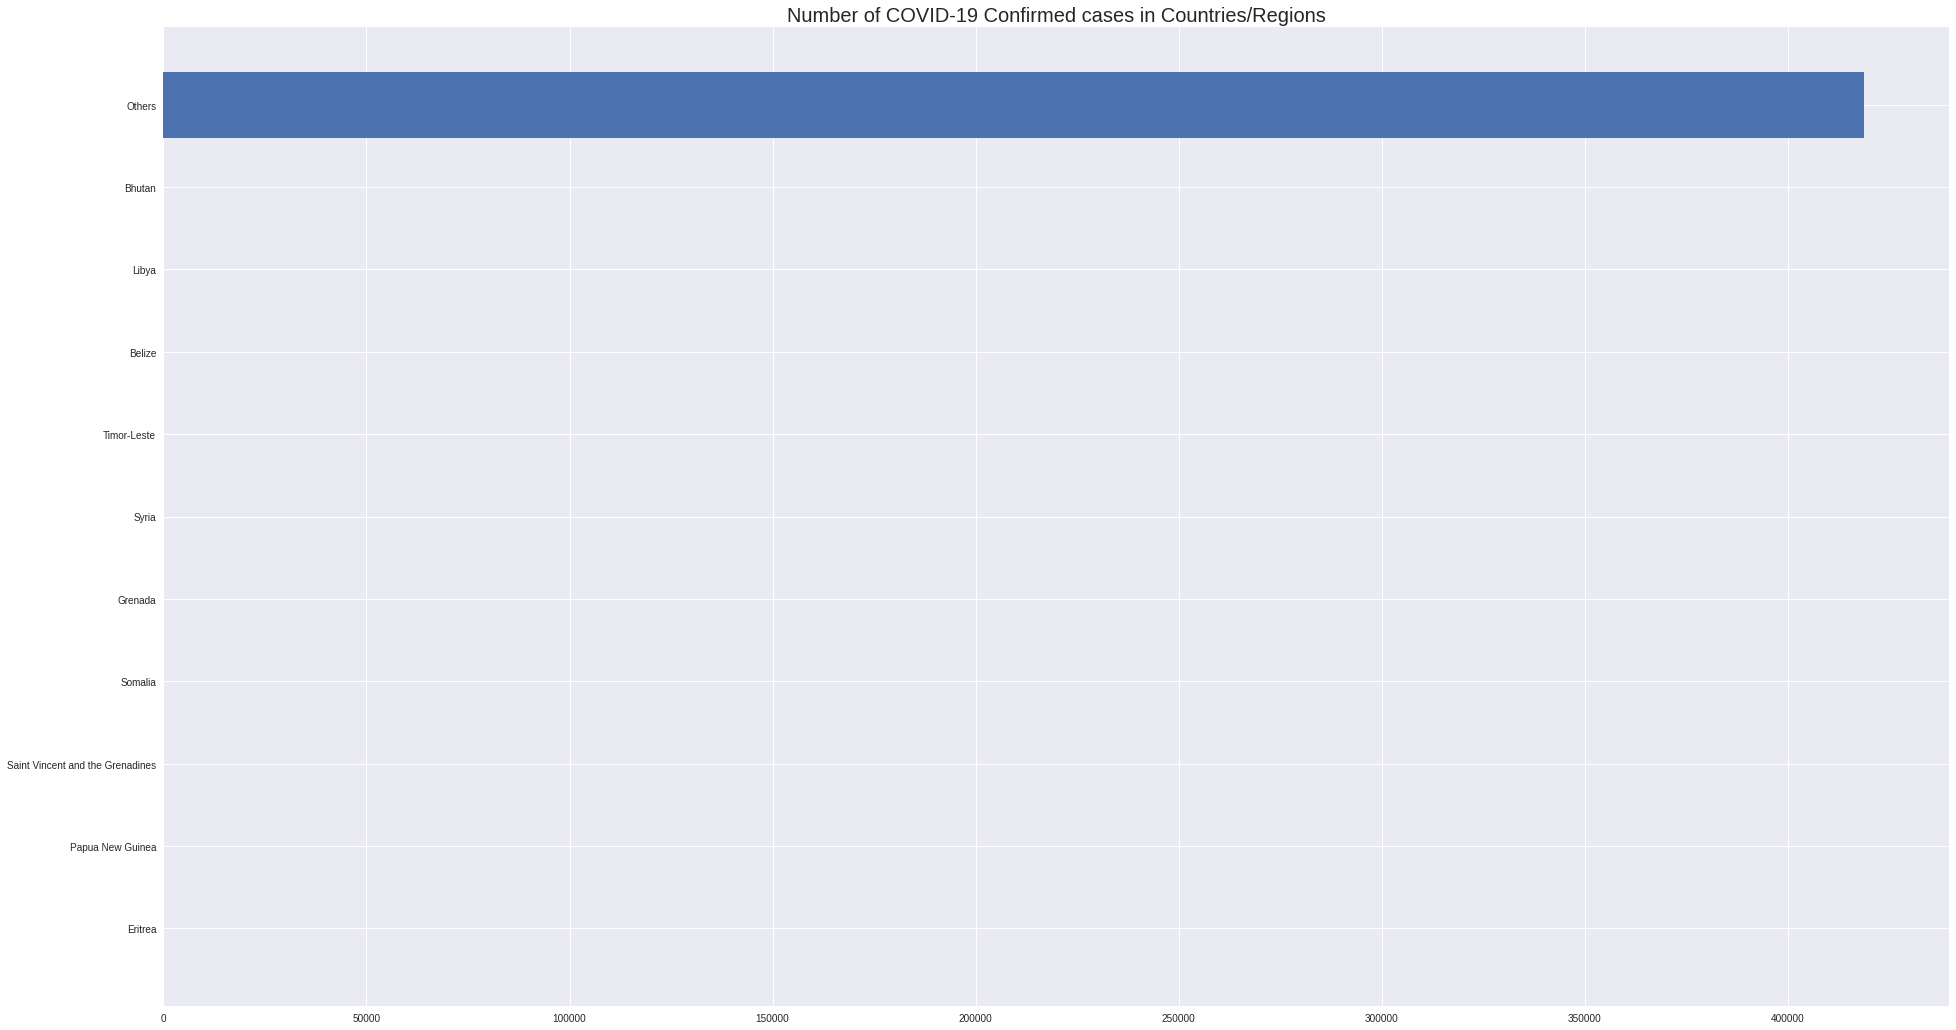

In [120]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of COVID-19 Confirmed cases in Countries/Regions', size=20)
plt.show()

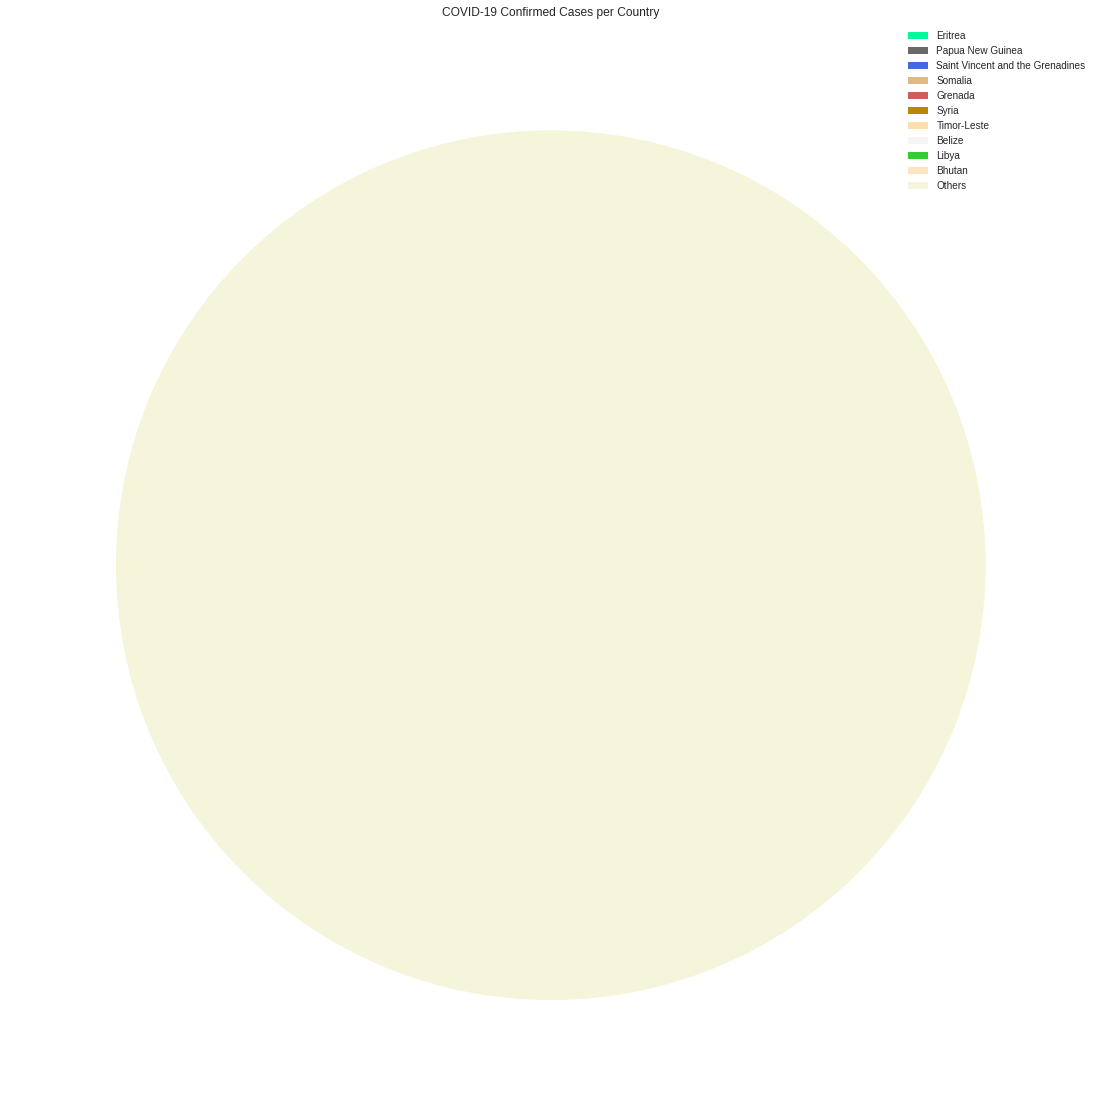

In [125]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('COVID-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()